In [1]:
# Course URL:
# https://deeplearningcourses.com/c/natural-language-processing-with-deep-learning-in-python
# https://udemy.com/natural-language-processing-with-deep-learning-in-python

# data from https://github.com/aritter/twitter_nlp/blob/master/data/annotated/ner.txt
# data2 from http://schwa.org/projects/resources/wiki/Wikiner#WikiGold

import numpy as np
from sklearn.utils import shuffle
from pos_baseline import LogisticRegression

number of samples: 13106
number of classes: 16
vocabulary size: 2110
('epoch:', 0)
('i:', 0, 'j:', 0, 'n_batches:', 91, 'cost:', array(2.7718503880132697), 'error:', 0.96999999999999997)
('epoch:', 1)
('i:', 1, 'j:', 0, 'n_batches:', 91, 'cost:', array(1.7971737158200523), 'error:', 0.46999999999999997)
('epoch:', 2)
('i:', 2, 'j:', 0, 'n_batches:', 91, 'cost:', array(1.3971521980843828), 'error:', 0.46000000000000002)
('epoch:', 3)
('i:', 3, 'j:', 0, 'n_batches:', 91, 'cost:', array(1.2194200802408965), 'error:', 0.42999999999999999)
('epoch:', 4)
('i:', 4, 'j:', 0, 'n_batches:', 91, 'cost:', array(1.1264109731050382), 'error:', 0.38)
('epoch:', 5)
('i:', 5, 'j:', 0, 'n_batches:', 91, 'cost:', array(1.2692726299489332), 'error:', 0.47999999999999998)
('epoch:', 6)
('i:', 6, 'j:', 0, 'n_batches:', 91, 'cost:', array(1.2197296370941397), 'error:', 0.41999999999999998)
('epoch:', 7)
('i:', 7, 'j:', 0, 'n_batches:', 91, 'cost:', array(1.4590248818688514), 'error:', 0.44)
('epoch:', 8)
('i

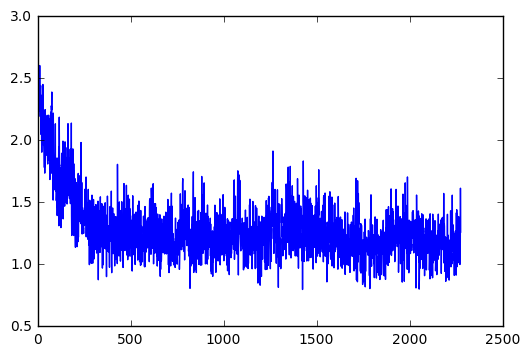

training complete
train score: 0.601961852861
train f1 score: 0.48681114928
test score: 0.450775883999
test f1 score: 0.296340436255


In [6]:
def get_data(split_sequences=False):
    word2idx = {}
    tag2idx = {}
    word_idx = 0
    tag_idx = 0
    Xtrain = []
    Ytrain = []
    currentX = []
    currentY = []
    for line in open('semantic_ann_data.txt'):
        line = line.rstrip()
        if line:
            r = line.split()
            word, tag = r
            word = word.lower()
            if word not in word2idx:
                word2idx[word] = word_idx
                word_idx += 1
            currentX.append(word2idx[word])
            
            if tag not in tag2idx:
                tag2idx[tag] = tag_idx
                tag_idx += 1
            currentY.append(tag2idx[tag])
        elif split_sequences:
            Xtrain.append(currentX)
            Ytrain.append(currentY)
            currentX = []
            currentY = []

    if not split_sequences:
        Xtrain = currentX
        Ytrain = currentY

    print "number of samples:", len(Xtrain)
    Xtrain, Ytrain = shuffle(Xtrain, Ytrain)
    Ntest = int(0.3*len(Xtrain))
    Xtest = Xtrain[:Ntest]
    Ytest = Ytrain[:Ntest]
    Xtrain = Xtrain[Ntest:]
    Ytrain = Ytrain[Ntest:]
    print "number of classes:", len(tag2idx)
    return Xtrain, Ytrain, Xtest, Ytest, word2idx, tag2idx


# def get_data2(split_sequences=False):
#     word2idx = {}
#     tag2idx = {}
#     word_idx = 0
#     tag_idx = 0
#     Xtrain = []
#     Ytrain = []
#     for line in open('../large_files/aij-wikiner-en-wp3'):
#         # each line is a full sentence
#         currentX = []
#         currentY = []
#         line = line.rstrip()
#         if not line:
#             continue
#         triples = line.split()
#         for triple in triples:
#             word, _, tag = triple.split('|')
#             if word not in word2idx:
#                 word2idx[word] = word_idx
#                 word_idx += 1
#             currentX.append(word2idx[word])
            
#             if tag not in tag2idx:
#                 tag2idx[tag] = tag_idx
#                 tag_idx += 1
#             currentY.append(tag2idx[tag])

#         Xtrain.append(currentX)
#         Ytrain.append(currentY)

#     if not split_sequences:
#         Xtrain = np.concatenate(Xtrain)
#         Ytrain = np.concatenate(Ytrain)

#     print "number of samples:", len(Xtrain)
#     Xtrain, Ytrain = shuffle(Xtrain, Ytrain)
#     Ntest = int(0.3*len(Xtrain))
#     Xtest = Xtrain[:Ntest]
#     Ytest = Ytrain[:Ntest]
#     Xtrain = Xtrain[Ntest:]
#     Ytrain = Ytrain[Ntest:]
#     print "number of classes:", len(tag2idx)
#     return Xtrain, Ytrain, Xtest, Ytest, word2idx, tag2idx


def main():
    Xtrain, Ytrain, Xtest, Ytest, word2idx, tag2idx = get_data()

    V = len(word2idx)
    print "vocabulary size:", V
    K = len(tag2idx)

    # train and score
    model = LogisticRegression()
    model.fit(Xtrain, Ytrain, V=V, K=K, epochs=25)
    print "training complete"
    print "train score:", model.score(Xtrain, Ytrain)
    print "train f1 score:", model.f1_score(Xtrain, Ytrain)
    print "test score:", model.score(Xtest, Ytest)
    print "test f1 score:", model.f1_score(Xtest, Ytest)

if __name__ == '__main__':
    main()